In [1]:
from helper_functions import *
import ipywidgets as widgets
from IPython.display import display
import cv2
from matplotlib import pyplot as plt
import open3d as o3d

%matplotlib notebook

out = widgets.Output()

# Guide

To run any cell, select the cell and press 'SHIFT + ENTER'.

1) Chose the data you want to work with, from the dropdown in cell 3.

2) (Optional) Manipulate the depth or rgb image in cell 4

3) Compute the pointcloud by running cell 5

4) (Optional) manipulate pointcloud in cell 6

5) Visualize pointcloud in cell 7

6) Visualize trajectory in cell 8

Select(description='Data file:', options=('0', '1', '2', '3'), value='0')

<IPython.core.display.Javascript object>


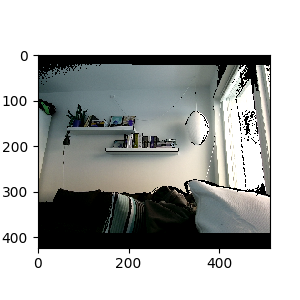

In [2]:
data_selection = widgets.Select(
    options= get_data_list(),
    description='Data file:',
    value='0',
    disabled=False,
)
def data_selection_eventhandler(change):
    out.clear_output()
    
    global rgb # opencv rgb image
    global depth # numpy depth image
    global intrinsics # intrinsics object, fx, fy, cx and cy see https://openkinect.github.io/libfreenect2/structlibfreenect2_1_1Freenect2Device_1_1IrCameraParams.html

    rgb_file = ("data/" + str(data_selection.value) + "_rgb.png")
    depth_file = ("data/" + str(data_selection.value) + "_depth.txt")
    intrinsic_file = ("data/" + str(data_selection.value) + "_intrinsic.txt")
    intrinsics = Intrinsics(intrinsic_file)
    rgb = cv2.imread(rgb_file)
    depth = np.loadtxt(depth_file)
    ax.imshow(rgb)
    fig.canvas.draw()

data_selection.observe(data_selection_eventhandler)
display(data_selection)

fig = plt.figure(figsize=(3,3))
ax = fig.add_subplot()


In [3]:
# You can manipulate the rgb image here. You have access to it in an opencv format, the variable is rgb
# If you want it as a numpy array: rgbArr = np.asarray(rgb)

# Once done compute the pointcloud in the next cell

In [6]:
# Computes a pointcloud, requires the rgb opencv image, the numpy depth image, and the intrinsic parameters
# It returns an array of the xyz coordinates for the points (pointcloud_array), and the normalized rgb colors 
# of the pointcloud points (pointcloud_colors)

pointcloud_array, pointcloud_colors = compute_pointcloud(rgb, depth, intrinsics)

In [7]:
# You can manipulate the pointcloud here. You have access to the pointcloud_array (xyz) 
# and the normalized rgb colors of the pointcloud (pointcloud_colors)

In [8]:
# Visualize the pointcloud here

pcd = o3d.geometry.PointCloud() # Constructs an open3d pointcloud object
pcd.points = o3d.utility.Vector3dVector(pointcloud_array) # Assigns the xyz points
pcd.colors = o3d.utility.Vector3dVector(pointcloud_colors) # Assigns colors to the xyz points
axis = o3d.geometry.TriangleMesh.create_coordinate_frame() # Visualizes coordinate system, sadly it is not centered
                                                            # on origin (0,0,0)
                                                            # axis color: x = red, y = green, z = blue
axis.scale(1000)

o3d.visualization.draw_geometries([axis, pcd]) # Draws and visualizes the pointcloud

In [9]:
# Visualize the scanning trajectory here.

# Describe scanning trajectory as a number_of_points x 6 numpy array.
# np.array([x, y, z, rotx, roty, rotz])
npArr = np.array([[-40, -50, 55, 140, 0, 0], 
                       [0, -50, 55, 120, 0, 0],
                      [40, -50, 55, 100, 0, 0],
                      [80, -50, 55, 80, 0, 0],
                      [120, -50, 55, 60, 0, 0],
                      [160, -50, 55, 40, 0, 0]])
axis = o3d.geometry.TriangleMesh.create_coordinate_frame()
axis.scale(500)




trajectory = Scanning_trajectory(npArr)
visualizer = o3d.visualization.Visualizer()
visualizer.create_window()
visualizer.add_geometry(axis)
visualizer.add_geometry(pcd)
for i in range(len(trajectory.cones)):
    visualizer.add_geometry(trajectory.cones[i].mesh)

visualizer.run()
visualizer.destroy_window() # dont remove this line

